In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

samples like: 8 + 6 3 / 2 - 4 7 4 / 5 - 1 / 5 / 4 9 / 9 + 1 + 8 4 - 7 9 9 + 3 / 4 + 7 / 9 - 6 / 6 4 + 3 / 3 1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2 23 2

In [8]:
seq = '8 + 6 * 3 / 2 - 4 * 7 * 4 / 5 - 1 / 5 / 4 * 9 / 9 + 1 + 8 * 4 - 7 * 9 * 9 + 3 / 4 + 7 / 9 - 6 / 6 * 4 + 3 / 3'.split(' ')
seq_len = len(seq)
seq_len

55

In [9]:
ds = '1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2'.split(' ')
syn_dis = [int(d) for d in ds]

In [10]:
prob_action = {i:[] for i in range(seq_len)}
mem = {i:[] for i in range(seq_len)}

In [11]:
i = 0
nc = 0
nt = 0
with open('feval-analy_d23_ne10-sarnn.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if line_json['type'] != 'actions':
            assert line_json['type'] == 'input'
            nc += line_json['is_correct']
            nt += 1
            continue 
        
        prob_action[i].append(line_json['all'])
        mem[i].append(line_json['mem'])        
        i += 1
        i %= seq_len

In [12]:
print('correct prediction%:', nc/nt)

correct prediction%: 0.094


In [13]:
remain = 4
step = []
for i in range(seq_len):
    step.append(np.array(mem[i]))
mean_mem_dist = []
for i in range(seq_len):
    mean_mem_dist.append((step[i].sum(0)/step[i].shape[0])[:, :remain])

In [14]:
for i in range(seq_len):
    mean_mem_dist[i] = np.hstack([mean_mem_dist[i], np.ones((10, 1))])
mem_whole = np.hstack(mean_mem_dist)
mem_whole.shape

(10, 275)

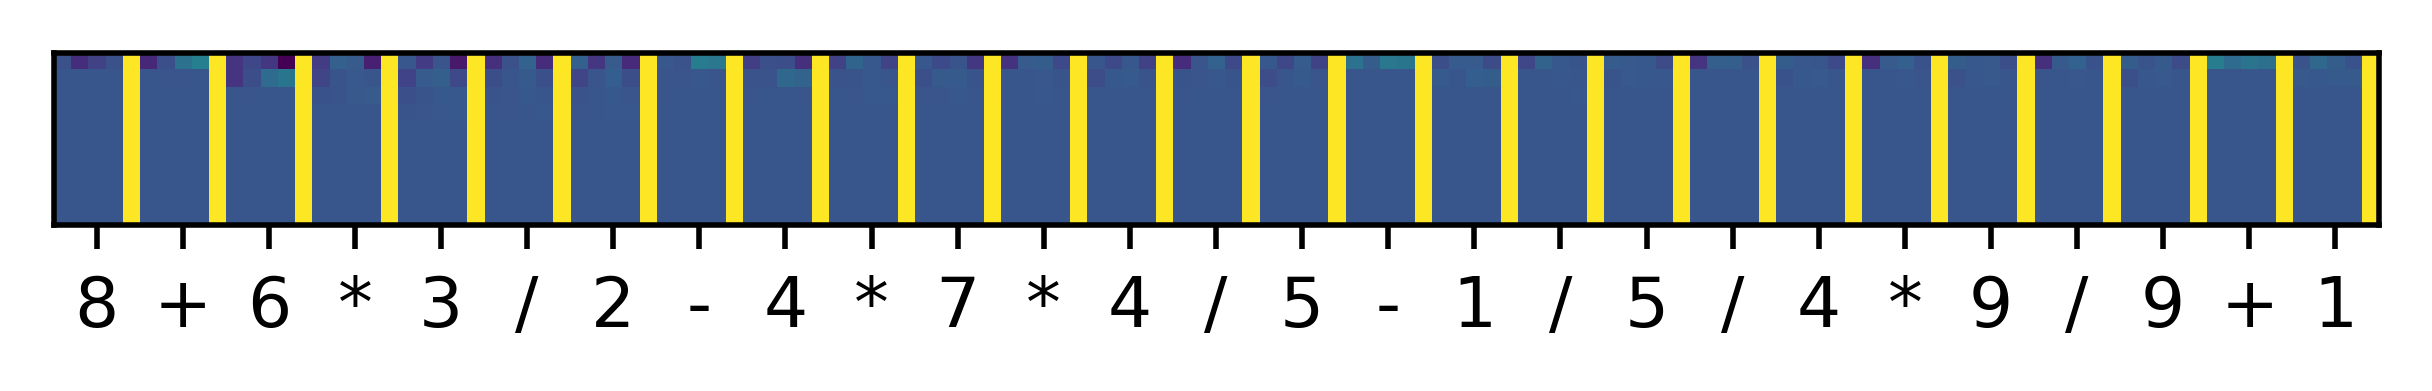

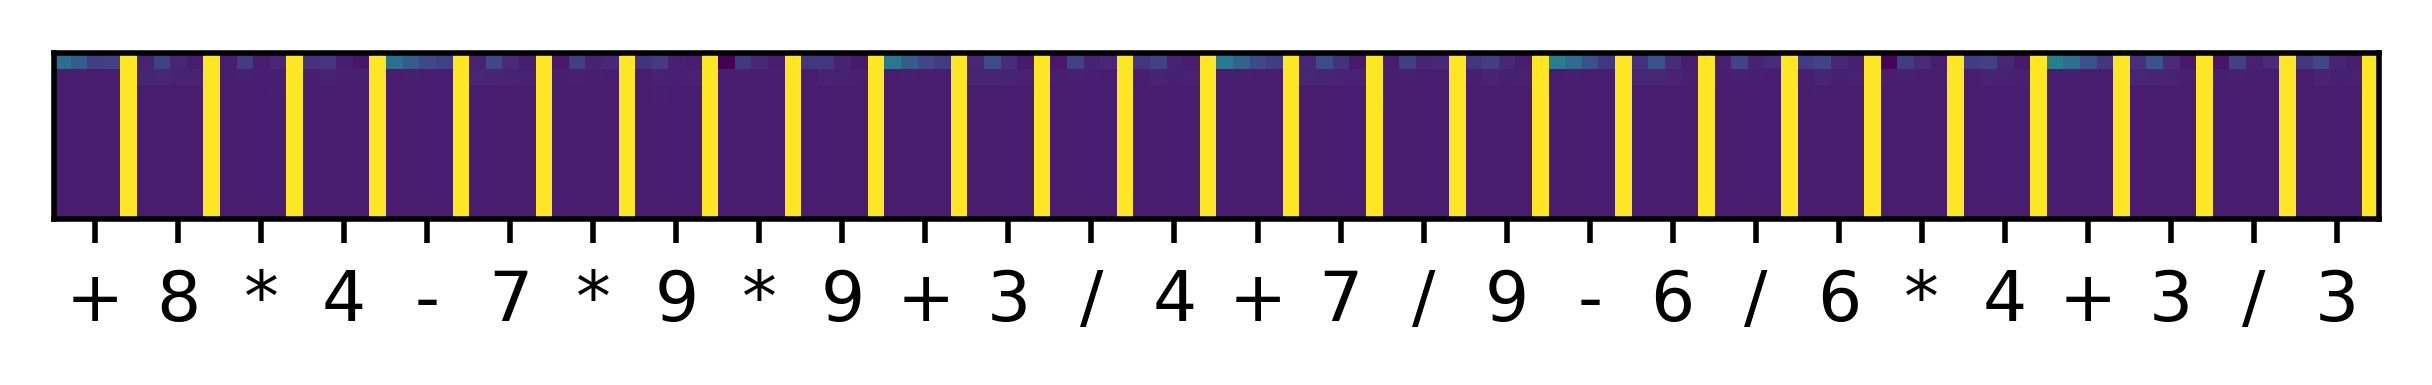

In [16]:
ncols = mem_whole.shape[1]
mid = seq_len // 2 * (remain + 1)
fig, ax = plt.subplots()
fig.dpi = 500
plt.imshow(mem_whole[:, :mid])
plt.xticks(np.arange(2, mem_whole.shape[1], 5)[:seq_len//2], list(seq)[:seq_len//2])
plt.yticks([])
plt.show()

fig, ax = plt.subplots()
fig.dpi = 500
plt.imshow(mem_whole[:, mid:])
plt.xticks(np.arange(2, mem_whole.shape[1], 5)[:seq_len-seq_len//2], list(seq)[seq_len//2:])
plt.yticks([])
plt.show()